## Credit Card Fraud Detection

In this project you will use machine learning abilities and use the two models Decision Trees and Support Vector Machine.
You will use a real data set to train each model. The data set contains September 2013 by European credit card transactions. Using the models you will see if transaction are is legit or not.

In [33]:
# install packages and data sets

!pip install opendatasets

import opendatasets as od

od.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

Skipping, found downloaded files in "./creditcardfraud" (use force=True to force download)


In [34]:
!pip install snapml

In [35]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

In [36]:
# read the data

raw_data = pd.read_csv('creditcardfraud/creditcard.csv')
print( 'there are' + str(len(raw_data)) + 'observations in the credit card fraud dataset')
print('there are' + str(len(raw_data.columns)) + 'variable in the dataset')

raw_data.head(10)

there are284807observations in the credit card fraud dataset
there are31variable in the dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [37]:
# we are creating a biggier dataset by inflating the number x10

n_replicas = 10

big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns = raw_data.columns)


print('There are' + str(len(big_raw_data)) + "observations in the credit card fraud department")
print('There are' + str(len(big_raw_data.columns)) + 'variables in the dataset.')

big_raw_data.head(11)

There are2848070observations in the credit card fraud department
There are31variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
5,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
6,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
7,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
8,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
9,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


In [38]:
big_raw_data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,...,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06,2.848070e+06
mean,9.481386e+04,-1.324446e-14,1.340438e-15,6.550136e-14,1.197344e-14,2.283693e-14,7.783620e-15,-7.100028e-15,2.583222e-15,-6.537487e-15,...,-1.518032e-15,-5.775379e-15,-1.459613e-15,3.022581e-15,3.452266e-15,3.369411e-15,-2.127629e-16,-2.997992e-16,8.834962e+01,1.727486e-03
std,4.748807e+04,1.958693e+00,1.651306e+00,1.516253e+00,1.415866e+00,1.380245e+00,1.332269e+00,1.237092e+00,1.194351e+00,1.098630e+00,...,7.345229e-01,7.257004e-01,6.244593e-01,6.056461e-01,5.212772e-01,4.822263e-01,4.036319e-01,3.300827e-01,2.501197e+02,4.152712e-02
min,0.000000e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000e+00,0.000000e+00
25%,5.420100e+04,-9.203749e-01,-5.985546e-01,-8.903718e-01,-8.486429e-01,-6.916019e-01,-7.682961e-01,-5.540842e-01,-2.086314e-01,-6.430992e-01,...,-2.283999e-01,-5.423525e-01,-1.618464e-01,-3.545929e-01,-3.171470e-01,-3.269890e-01,-7.083969e-02,-5.296012e-02,5.600000e+00,0.000000e+00
50%,8.469200e+04,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,2.200000e+01,0.000000e+00
75%,1.393210e+05,1.315648e+00,8.037276e-01,1.027201e+00,7.433540e-01,6.119269e-01,3.985694e-01,5.704465e-01,3.273459e-01,5.971404e-01,...,1.863843e-01,5.285552e-01,1.476421e-01,4.395273e-01,3.507157e-01,2.409571e-01,9.104646e-02,7.828090e-02,7.717000e+01,0.000000e+00
max,1.727920e+05,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,2.569116e+04,1.000000e+00


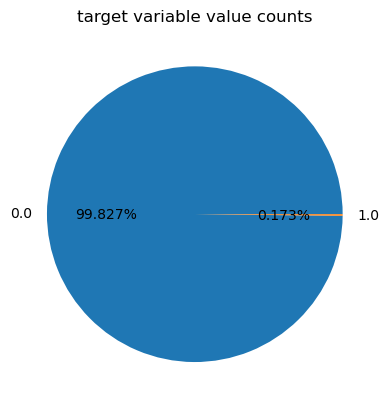

In [39]:
# getting the set of distinct classes
labels= big_raw_data.Class.unique()

#get he count of each class
sizes = big_raw_data.Class.value_counts().values

#plot the class value counts
fig, ax =plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('target variable value counts')
plt.show()
       


as you will see above the pie chart represents 0 and 1. 0 being the transaction is legit and 1 representing the transaction is fraud. Another note while looking at the pie chart is that the dataset is unbalanced this means that the targeted classes are not represented equally. 

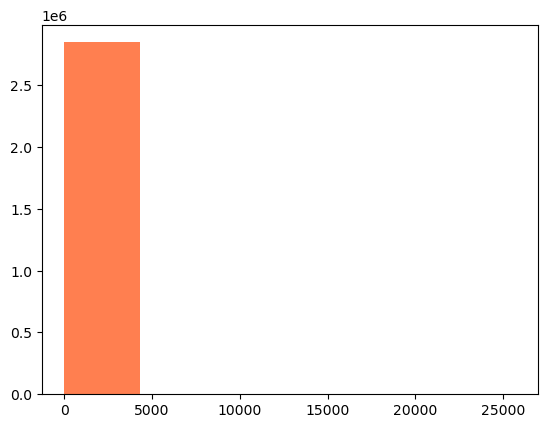

Min 0.0
Max 25691.16
Perccentile 203.0


In [40]:
plt.hist(big_raw_data.Amount.values, 6, histtype = 'bar', facecolor ='coral')
plt.show()

print('Min', np.min(big_raw_data.Amount.values))
print('Max', np.max(big_raw_data.Amount.values))
print('Perccentile', np.percentile(big_raw_data.Amount.values, 90))

## Data Processing 

In [41]:
# Ill use the scaling/normalization which is typlically used for,
# linear model to accelerate the training convergence.

# standardizing the features by removing the mean and scaling to unit variables.
big_raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:, 1:30])
data_matrix = big_raw_data.values

# X feature matrtix
X = data_matrix[:, 1:30]

# y: Labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm='l1')

# print the shape of the features matrix
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (2848070, 29) y.shape= (2848070,)


In [42]:
# Dataset train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


## Decision Tree Build 

In [43]:
w_train = compute_sample_weight('balanced', y_train)

from sklearn.tree import DecisionTreeClassifier

sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

# Training the decision tree 
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight = w_train)
sklearn_time = time.time() -t0
print('[Scikit-Learn] Trainging time (s): {0:.5f}'.format(sklearn_time))

[Scikit-Learn] Trainging time (s): 62.26218


### Building a decision tree with Snap ML

In [44]:
w_train = compute_sample_weight('balanced', y_train)
 
from snapml import DecisionTreeClassifier

snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

# Training the decision tree 
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight = w_train)
snapml_time = time.time() -t0
print('[Snap ML] Trainging time (s): {0:.5f}'.format(snapml_time))

[Snap ML] Trainging time (s): 9.80338


In [45]:
# Evaluate both models 

training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

#compute the probabilities of samples
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]

#curve the ROC-AUC score from prdictions
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score: {0:.3f}'.format(sklearn_roc_auc))

# compute probabilities of samples
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

# Curve ROC-AUC score from predicion
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)
print ('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))
      

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 6.35x 
[Scikit-Learn] ROC-AUC score: 0.966
[Snap ML] ROC-AUC score : 0.966


## Building a Vector Machine model Scikit-Learn

In [49]:
# Importing the linear vector machine model
from sklearn.svm import LinearSVC

sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss='hinge', fit_intercept=False)

# train a linear support vector medel
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() -t0
print('[Scikit-Learn] Training Time (s): {0:.2f}'.format(sklearn_time))

[Scikit-Learn] Training Time (s): 91.98


## Vector Machine Model Snapml

In [ ]:
# import the support vector machine model (SVM)
from snapml import SupportVectorMachine

# to set the number of threads used at trainig time
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)

# train as SVM model using Snap ML
t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print('[Snap ML] Training time (s): {0:.2f}'.format(snapml_time))